## Проект по предмету вероятностно-статистические методы в управлении
Подготовили:

Дятлов Григорий ИУ1-12М

Водопьянов Владислав ИУ1-11М

### Иморты и подготовка датасета

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, chi2_contingency

In [63]:
data = pd.read_csv("ds_salaries.csv")

In [64]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Удаляем поля salary, salary_currency, так как они не дают объективного представления о зарплате ввиду разных единиц измерения

Удаляем поля employee_residence, company_location, так как абсолютное большинство компаний из Соединенных Штатов

In [65]:
data = data.drop(["salary", "salary_currency", "employee_residence", "company_location"], axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2023,SE,FT,Principal Data Scientist,85847,100,L
1,2023,MI,CT,ML Engineer,30000,100,S
2,2023,MI,CT,ML Engineer,25500,100,S
3,2023,SE,FT,Data Scientist,175000,100,M
4,2023,SE,FT,Data Scientist,120000,100,M


### Гипотеза 1
Зарплата одной специальности в среднем растет от года к году

Нулевая гипотеза: матожидание зарплаты не будет изменяться от года к году

alpha = 0.001

In [66]:
# Делаем выборки зарплат по годам для одной специальности (например, Data Scientist)
salary_2020 = data[data['work_year'] == 2020]['salary_in_usd']
salary_2021 = data[data['work_year'] == 2021]['salary_in_usd']
salary_2022 = data[data['work_year'] == 2022]['salary_in_usd']
salary_2023 = data[data['work_year'] == 2023]['salary_in_usd']

# Проверяем нормальность распределений (если ненормальные - используем Крускала-Уоллиса)
statistic, p_value = kruskal(salary_2020, salary_2021, salary_2022, salary_2023)
p_value

9.831020555341531e-50

In [67]:
hyp_1 = data[["work_year", "salary_in_usd"]].groupby("work_year").mean().reset_index()
hyp_1

,work_year,salary_in_usd
0,2020,92302.631579
1,2021,94087.208696
2,2022,133338.620793
3,2023,149045.541176


Text(0, 0.5, 'Средняя зарплата в год (USD)')

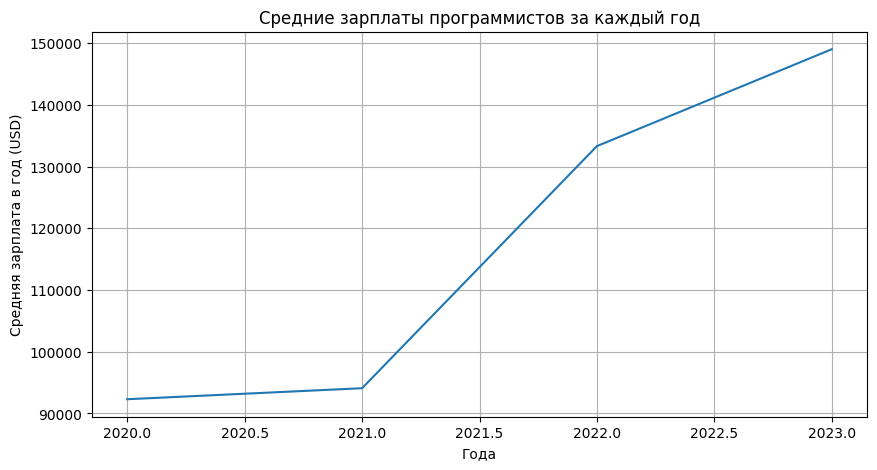

In [68]:
figure = plt.figure(figsize=(10, 5))
plt.plot(hyp_1["work_year"], hyp_1["salary_in_usd"])
plt.grid()
plt.title("Средние зарплаты программистов за каждый год")
plt.xlabel("Года")
plt.ylabel("Средняя зарплата в год (USD)")

### Гипотеза 2
Зарплата тем больше, чем больше опыт

Нулевая гипотеза: матожидание зарплаты не зависит от квалификации

appha = 0.001


In [69]:
# Делаем выборки зарплат по уровням опыта
salary_en = data[data['experience_level'] == 'EN']['salary_in_usd']
salary_mi = data[data['experience_level'] == 'MI']['salary_in_usd']
salary_se = data[data['experience_level'] == 'SE']['salary_in_usd']
salary_ex = data[data['experience_level'] == 'EX']['salary_in_usd']

# Применяем критерий Крускала-Уоллиса для проверки различий
statistic, p_value = kruskal(salary_en, salary_mi, salary_se, salary_ex)
p_value

5.077553185849974e-171

In [70]:
hyp_2 = data[["experience_level", "salary_in_usd"]].groupby("experience_level").mean().sort_values("salary_in_usd").reset_index()
hyp_2

,experience_level,salary_in_usd
0,EN,78546.284375
1,MI,104525.939130
2,SE,153051.071542
3,EX,194930.929825


Text(0, 0.5, 'Средняя зарплата в год (USD)')

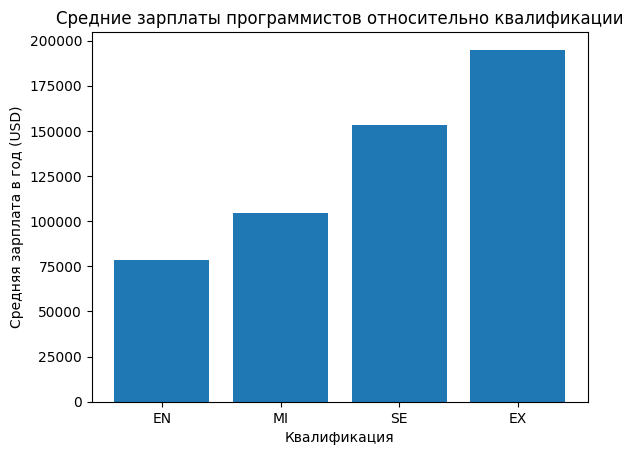

In [71]:
fig, ax = plt.subplots()
ax.bar(hyp_2["experience_level"], hyp_2["salary_in_usd"])
plt.title("Средние зарплаты программистов относительно квалификации")
plt.xlabel("Квалификация")
plt.ylabel("Средняя зарплата в год (USD)")

### Гипотеза 3
Процент работы, выполненной удаленно, падает с 2020 года до 2023

Нулевая гипотеза: матожидание количества работы, выполненной удаленно, не зависит от года

alpha = 0.001

In [72]:
# Делаем выборки удаленного процента по годам
remote_2020 = data[data['work_year'] == 2020]['remote_ratio']
remote_2021 = data[data['work_year'] == 2021]['remote_ratio']
remote_2022 = data[data['work_year'] == 2022]['remote_ratio']
remote_2023 = data[data['work_year'] == 2023]['remote_ratio']

# Применяем критерий Крускала-Уоллиса для проверки различий
statistic, p_value = kruskal(remote_2020, remote_2021, remote_2022, remote_2023)
p_value

1.689005537056002e-51

In [73]:
hyp_3 = data[["work_year", "remote_ratio"]].groupby("work_year").mean().reset_index()
hyp_3

,work_year,remote_ratio
0,2020,65.131579
1,2021,68.695652
2,2022,55.408654
3,2023,34.061625


Text(0, 0.5, 'Доля удаленной работы')

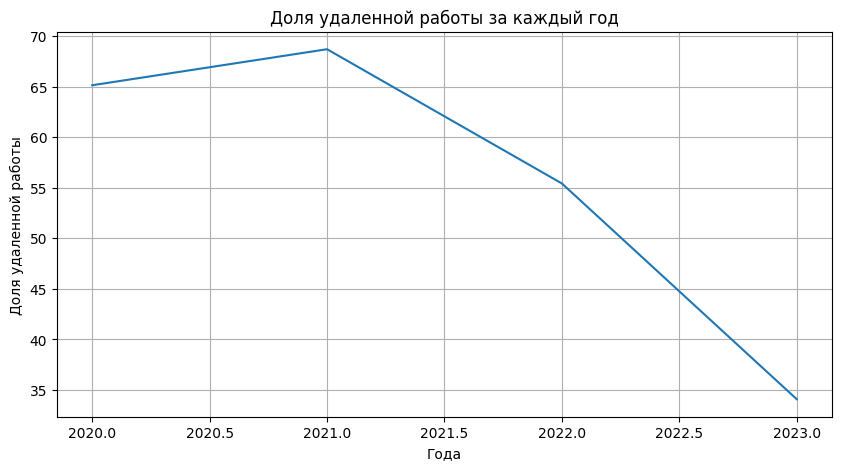

In [74]:
figure = plt.figure(figsize=(10, 5))
plt.plot(hyp_3["work_year"], hyp_3["remote_ratio"])
plt.grid()
plt.title("Доля удаленной работы за каждый год")
plt.xlabel("Года")
plt.ylabel("Доля удаленной работы")

### Гипотеза 4
Гибридный график работы оплачивается менее полностью очного или полностью дистанционного

Нулевая гипотеза: матожидания зарплат не зависят от объема работы, выполненного удаленно

alpha = 0.01

In [75]:
# Делаем выборки зарплат по типу рабочего графика
salary_onsite = data[data['remote_ratio'] == 0]['salary_in_usd']
salary_hybrid = data[data['remote_ratio'] == 50]['salary_in_usd']
salary_remote = data[data['remote_ratio'] == 100]['salary_in_usd']

# Применяем критерий Крускала-Уоллиса для проверки различий
statistic, p_value = kruskal(salary_onsite, salary_hybrid, salary_remote)
p_value

8.326299163076325e-46

In [76]:
hyp_4 = data[["remote_ratio", "salary_in_usd"]].groupby("remote_ratio").mean().reset_index()
hyp_4

,remote_ratio,salary_in_usd
0,0,144316.202288
1,50,78400.687831
2,100,136481.452830


Text(0, 0.5, 'Средняя зарплата в год (USD)')

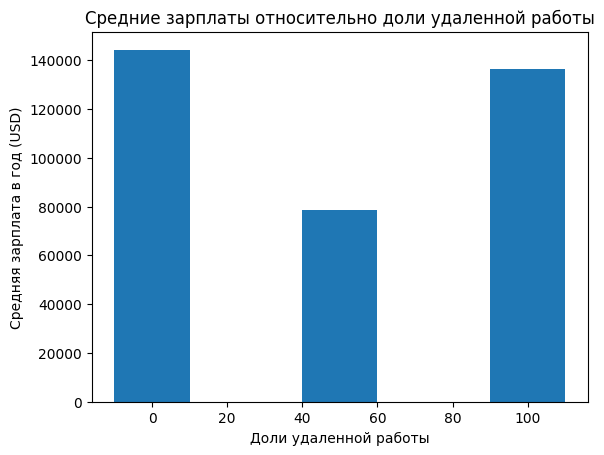

In [77]:
fig, ax = plt.subplots()
ax.bar(hyp_4["remote_ratio"], hyp_4["salary_in_usd"], width=20)
plt.title("Средние зарплаты относительно доли удаленной работы")
plt.xlabel("Доли удаленной работы")
plt.ylabel("Средняя зарплата в год (USD)")

### Гипотеза 5
В процентном соотношении программистов максимального ранга тем меньше, чем больше размер компании


In [78]:
# Создаем таблицу сопряженности для размеров компании и количества сотрудников уровня EX
contingency_table = pd.crosstab(data['company_size'], data['experience_level'])

# Применяем критерий хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

1.3064664254736195e-70

In [79]:
grouped = data.groupby(['company_size', 'experience_level']).size().reset_index(name='Count')
total_counts = data.groupby('company_size').size().reset_index(name='TotalCount')
hyp_5 = pd.merge(grouped, total_counts, on='company_size')
hyp_5['Percentage'] = (hyp_5['Count'] / hyp_5['TotalCount']) * 100
hyp_5 = hyp_5[hyp_5["experience_level"] == "EX"]
hyp_5

,company_size,experience_level,Count,TotalCount,Percentage
1,L,EX,13,454,2.863436
5,M,EX,95,3153,3.013003
9,S,EX,6,148,4.054054


In [80]:
hyp_5["Percentage"]

1    2.863436
5    3.013003
9    4.054054
Name: Percentage, dtype: float64

Text(0, 0.5, 'Доля в процентах')

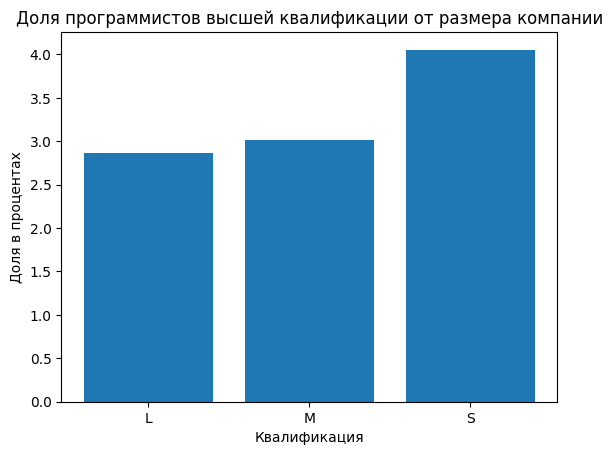

In [81]:
fig, ax = plt.subplots()
ax.bar(hyp_5["company_size"], hyp_5["Percentage"])
plt.title("Доля программистов высшей квалификации от размера компании")
plt.xlabel("Квалификация")
plt.ylabel("Доля в процентах")

### Гипотеза 6
Компаний среднего размера больше всего

In [82]:
hyp_6 = data["company_size"].value_counts().reset_index()
hyp_6

,company_size,count
0,M,3153
1,L,454
2,S,148


Text(0, 0.5, 'Количество')

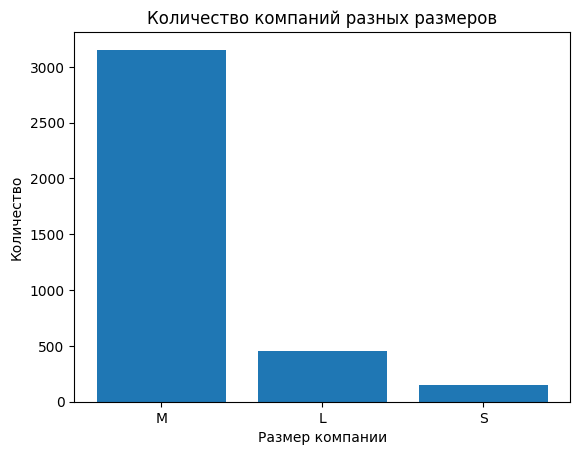

In [83]:
fig, ax = plt.subplots()
ax.bar(hyp_6["company_size"], hyp_6["count"])
plt.title("Количество компаний разных размеров")
plt.xlabel("Размер компании")
plt.ylabel("Количество")

### Гипотеза 7
Программисты высокого (сеньоры) ранга получают тем меньше зарплату, чем меньше размер компании

In [84]:
# Фильтрация данных для сеньоров (SE)
salary_senior_small = data[data['company_size'] == 'S']['salary_in_usd']
salary_senior_medium = data[data['company_size'] == 'M']['salary_in_usd']
salary_senior_large = data[data['company_size'] == 'L']['salary_in_usd']

# Применяем критерий Крускала-Уоллиса
statistic, p_value = kruskal(salary_senior_small, salary_senior_medium, salary_senior_large)
p_value

2.1109297806424672e-48

In [85]:
hyp_7 = data.groupby(['company_size', 'experience_level']).mean("salary_in_usd").reset_index()
hyp_7 = hyp_7[hyp_7["experience_level"] == "SE"]
hyp_7

,company_size,experience_level,work_year,salary_in_usd,remote_ratio
3,L,SE,2021.961353,156159.690821,52.173913
7,M,SE,2022.532657,153643.334069,43.821712
11,S,SE,2021.511628,106875.465116,76.744186


Text(0, 0.5, 'Зарплата (USD)')

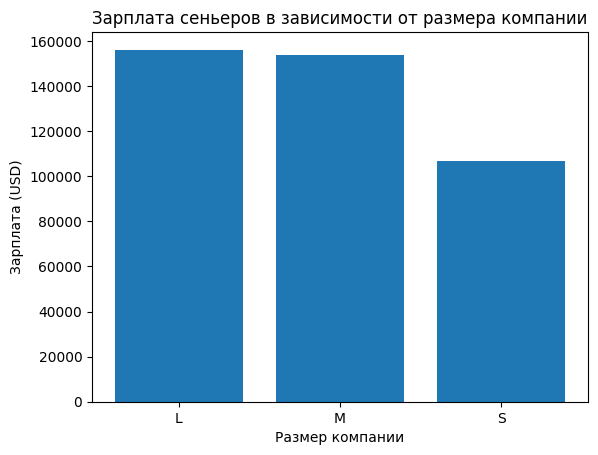

In [86]:
fig, ax = plt.subplots()
ax.bar(hyp_7["company_size"], hyp_7["salary_in_usd"])
plt.title("Зарплата сеньеров в зависимости от размера компании")
plt.xlabel("Размер компании")
plt.ylabel("Зарплата (USD)")